---
# Mounting of Google Drive
---
Linking the Google Drive to Google CoLab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
CourseFolder = "/content/gdrive/MyDrive/Crafting/BDLCV"

---
# Load an image
---


In [ ]:
import matplotlib.pyplot as plt
import imutils
import cv2
import numpy as np

original_image = cv2.imread(CourseFolder + '/images/car-224.jpg')

---
# Image Convolution
---


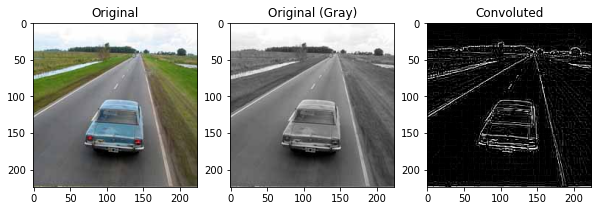

In [ ]:
gray_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Edge detection 
kernel = np.asarray( [[-1, -1, -1], 
                      [-1,  8, -1],
                      [-1, -1, -1]], dtype=np.int8)

# Horizontal line detection
# kernel = np.asarray( [[-1, -1, -1], 
#                       [ 2,  2,  2],
#                       [-1, -1, -1]], dtype=np.int8)


convoluted_image = cv2.filter2D(gray_original, -1, cv2.flip(kernel, -1))

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(imutils.opencv2matplotlib(original_image))
plt.gca().title.set_text('Original')

plt.subplot(1, 3, 2)
plt.imshow(imutils.opencv2matplotlib(gray_original))
plt.gca().title.set_text('Original (Gray)')

plt.subplot(1, 3, 3)
plt.imshow(imutils.opencv2matplotlib(convoluted_image))
plt.gca().title.set_text('Convoluted')

plt.show()

---
# Classifying CIFAR with CNN
---
The Canadian Institute for Advanced Research (CIFAR)  provides the CIFAR-10 and CIFAR-100 datasets with 10 and 100 classifications respectively.
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

The label data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10.

airplane : 0  
automobile : 1  
bird : 2  
cat : 3  
deer : 4  
dog : 5  
frog : 6  
horse : 7  
ship : 8  
truck : 9  

The code below load the CIFAR-10 dataset.

### Import necessary libraries and dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


# Load the MNIST data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('train_images shape:', train_images.shape)
print('train_labels shape:', train_labels.shape)
print('test_images shape:', test_images.shape)
print('test_labels shape:', test_labels.shape)

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 1)
test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)


Running the above loads the dataset and prints the shape of the input and output components of the train, test and train labels and test splits of images.

Display a sample<br>
The images are colour image with a low resolution of 32 by 32 oixels.

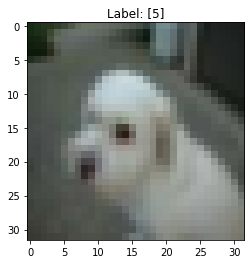

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

pos = random.randint(0, 50000)
tmp_img = train_images[pos]
plt.imshow(tmp_img)
plt.title("Label: "+str(train_labels[pos]))
plt.show()

### Process the data for the usage of ANN <br>


The next preprocessing task is to normalise the pixel value by dividing them by 255.


In [ ]:
train_images = train_images.astype('float32') / 255 # normalise data to 0-1
test_images = test_images.astype('float32') / 255

We then use keras utility function to_categorical() function convert an array of labelled data(from 0 to 9) to one-hot vector. An example if given below:

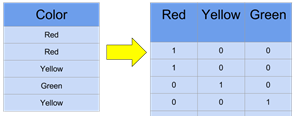

For an indepth discussion on one-hot encoding, please refer to https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/




* Use to_categorical() to convert a class vector (integers) to binary class matrix.  A visual example is shown below to illustrate the operation.

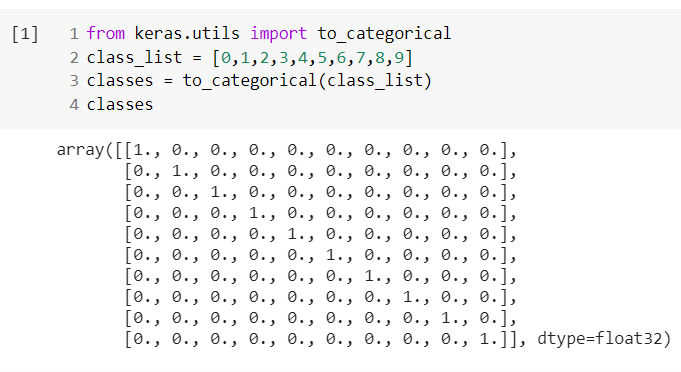

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Define the network




The convolution neural network (CNN) that we are creating first performs two layers of convolutions with 32 kernels each, follow by a Max-pooling. Following that is another two layers of convolutions with 64 kernels each and then another Max Pooling. The final extracted features are normalized and flatten to be calssified by a dense layer and a output layer.

In [ ]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation="relu", padding='same', input_shape=train_images.shape[1:]))
network.add(layers.Conv2D(32, (3, 3), activation="relu"))
network.add(layers.MaxPooling2D(pool_size=(2, 2)))
network.add(layers.Dropout(0.2))

network.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
network.add(layers.Conv2D(64, (3, 3), activation="relu"))
network.add(layers.MaxPooling2D(pool_size=(2, 2)))
network.add(layers.Dropout(0.2))

network.add(layers.BatchNormalization())
network.add(layers.Flatten())

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(10, activation='softmax'))

The network is compiled with the adam optimizer and categorial cross-entropy. The accuracy of each ephocs is configured to be saved.

In [ ]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

### Train the network


Now we’re ready to train the model. We call the function ```fit()``` to perform the training.

First, we pass in the training data and the matching answers for each training example. Then we have several parameters that we can control: 
* **epochs** is how many times we will loop through the entire training dataset before ending the gradient descent training process. 
*	**batch_size** controls how many training examples are considered at once during each gradient descent update pass. 


In [ ]:
history = network.fit(train_images, train_labels, epochs=50, batch_size=128)

Epoch 1/50
391/391 [==============================] - 7s 11ms/step - loss: 1.3956 - accuracy: 0.4996
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 1.0010 - accuracy: 0.6467
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 0.8294 - accuracy: 0.7080
Epoch 4/50
391/391 [==============================] - 4s 10ms/step - loss: 0.7206 - accuracy: 0.7454
Epoch 5/50
391/391 [==============================] - 4s 10ms/step - loss: 0.6432 - accuracy: 0.7745
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 0.5649 - accuracy: 0.8002
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 0.5115 - accuracy: 0.8200
Epoch 8/50
391/391 [==============================] - 4s 10ms/step - loss: 0.4573 - accuracy: 0.8371
Epoch 9/50
391/391 [==============================] - 4s 10ms/step - loss: 0.4164 - accuracy: 0.8503
Epoch 10/50
391/391 [==============================] - 4s 10ms/step - loss: 0.3799 - accura

### Plot the learning curve

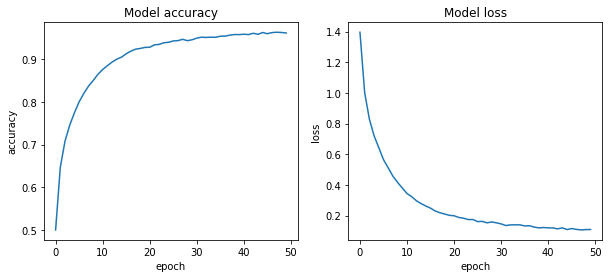

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

### Evaluate the network


After training, we can call the **evaluate()** function to have a feel of how our model perform

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9624 - accuracy: 0.7933
test_acc: 0.7932999730110168


A more detailed analysis on the performance of the model can be accomplished with a **Confusion Matrix**.

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. [ref](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

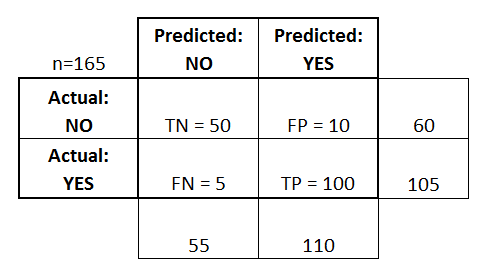

*   **true positives (TP)**: These are cases in which we predicted yes (they have the disease), and they do have the disease.
*   **true negatives (TN)**: We predicted no, and they don't have the disease.
*   **false positives (FP)**: We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
*   **false negatives (FN)**: We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

With the confusion mattix, several different performance measures can be calcualted. The most common measures are:
* Precision - From all the classes we have predicted as positive, how many are actually positive?
* Recall - From all the positive classes, how many we predicted correctly?
* F1 - measure Recall and Precision at the same time

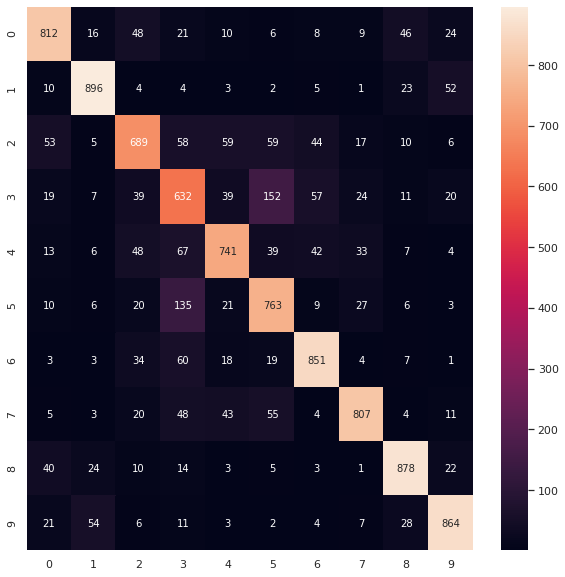

Precison: [0.8235294  0.8784314  0.75054467 0.60190475 0.7882979  0.6923775
 0.82862705 0.86774194 0.8607843  0.857994  ]
Recall: [0.812 0.896 0.689 0.632 0.741 0.763 0.851 0.807 0.878 0.864]
F1: [0.81772405 0.8871287  0.71845675 0.6165853  0.76391757 0.7259753
 0.8396645  0.8362694  0.8693069  0.86098653]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

predict_labels = network.predict(test_images)
pred_l = tf.argmax(predict_labels, 1)
test_l = tf.argmax(test_labels, 1)

total_cm = tf.math.confusion_matrix(test_l, pred_l)

diag_part=tf.cast(tf.linalg.diag_part(total_cm), tf.float32)
precision=diag_part/(tf.cast(tf.reduce_sum(total_cm,0), tf.float32)+tf.constant(1e-15))
recall=diag_part/(tf.cast(tf.reduce_sum(total_cm,1), tf.float32)+tf.constant(1e-15))
f1=2*precision*recall/(precision+recall+tf.constant(1e-15))

df_cm = pd.DataFrame(total_cm.numpy(), range(10), range(10))
plt.figure(figsize=(10,10))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 10}) # font size
plt.show()

print("Precison:", precision.numpy())
print("Recall:", recall.numpy())
print("F1:", f1.numpy())